# 长期价值投资的数据监测

In [141]:
#imports

import yfinance as yf
import pandas as pd
import datetime as dt
import seaborn as sns
from  matplotlib import pyplot as plt

#init
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, 
            rc={'figure.figsize':(15,10)})
#pd.options.display.float_format = '{:,.2f}'.format

#parameters
ticker_list=['FB','MSFT','AAPL','GOOG','AMZN','BABA',
'NVDA','0700.HK','ADBE','MO','ADSK','ASML','BRK-B',
'GS','ISRG','KO','MA','TSM','ADBE','MCO','1810.HK'

]



In [142]:
print('This notebook was refreshed at %s'%(dt.datetime.now()))

This notebook was refreshed at 2021-12-27 12:51:21.644510


## 基本投资思路

长期价值投资的基本思路是寻找好的公司，然后以好的价格（机会成本）长期持有其股票，以分享公司带来的长期收益。这里有两个核心问题：
1. 何为好公司？
2. 何为好价格？

之所以投资好公司如此重要，而不只是便宜就好，是因为越是成熟的市场，定价越合理，捡便宜的机会很少见。而且，个人对公司价值的判断是容易出错的，捡便宜容易落入价值陷阱。而好的公司给予了更多的容错能力，对于估值的要求降低了，投资成功率更高。而且，价值投资最重要的是信心，优秀的公司才可以在市场下跌时依然保持信心、坚定持有。

好公司的核心标准是有宽阔的护城河，这样的公司可以成功对抗各种市场风险和经济周期，然后让复利的威力在长期投资中充分发挥出来，获得超越市场的可观回报。 于是寻找好公司就转化成了什么样的公司具有护城河？通常来说，公司的护城河来自以下几个方面：
+ 无形资产：无形资产中对护城河最有价值的事品牌。
    + 品牌：公司的无形资产中，最能构筑护城河的是品牌，这点对于大众消费领域尤其重要。一个好的品牌可以有效减少用户的搜索成本，在同等产品力下获得用户的优先选择。一些强大的品牌，还可以有品牌溢价以获得更高的利润率。这里知名品牌不等于有护城河的品牌，关键是要看该品牌能否影响消费行为，带来产品溢价。最典型的品牌护城河比如奢侈品品牌。
    + 法定许可：一些特别的业务领域，是需要政府特别审批的，天然有门槛，此类护城河通常是比较稳的。但是需要进一步观察此类护城河能否转变成定价权，因为一些关键的公共服务，政府才是掌握定价权的一方。
    + 专利： 科技型公司可以通过各种专利和著作权保护来构筑护城河。但是专利有有效期，而且新技术可能会让很赚钱的专利瞬间一文不值。依靠技术壁垒构建护城河的公司，需要特别考虑其专利池的深度和研发能力，以确保其技术优势长期存在，这通常是很困难的。
+ 转化成本：不同的产品和服务，天然有不同的转化成本。转化成本如果很高，那么就会形成护城河。这里最典型的行业是对企业的软件和服务。企业的运行如果构建在一些核心软件产品和服务上，那么企业会在这方面投入大量的资金、时间和人力资源，转化解决方案带来的效益往往不能超越转化成本。对于个人用户而言，转化成本主要和时间成本有关，网络效应也是转化成本的重要因素。
+ 网络效应：网络效应是最稳固的护城河。如果一家公司的用户数在提高，其产品和服务的价值也在提高，那么这样的公司就容易犹豫网络效应带来垄断地位。通常互联网和信息服务行业容易形成网络效应。网络效应可以让强者更强。
+ 成本优势：成本优势对于价格敏感型行业非常关键。成本优势可能来自4个方面：低成本的流程优势、更优越的地理位置、与众不同的资源和相对较大的市场规模。
    + 规模优势带来的成本优势是比较牢固的护城河。规模效应来自网络规模和生产规模。固定成本占比越大的行业，规模效应越明显。
    + 优越的地理位置和资源带来也能带来牢固的护城河，因为这些优势不可复制。但是这里企业的业务增长空间比较有限。这类护城河经常见于水泥厂、垃圾处理厂、采矿等行业。这些行业的公司对于其辐射半径内的市场具有很强的成本优势。
    + 一些公司凭借优秀的流程和管理也能有成本优势，但此类优势通常不持久，因为很容易被模仿。

以上就是常见的护城河的来源，我们需要容果深入理解公司的业务来理解其护城河，这里主要是定性分析。但是，企业的护城河会最终体现到经营数据上，其中最重要的就是各种盈利能力指标。通过对盈利指标的分析，可以帮助我们寻找有护城河的好标的，也可以帮助我们验证所投资标的的护城河是否依然稳固。这些指标包括：
+ ROE, ROA, ROIC
+ Gross Margin, Profit Margin, CF Margin


在确定了投资标的之后，在什么价位上持有这些股票是另一个可以很大程度决定投资回报率的因素。对于企业的估值，是一个预测其未来现金流的过程。拥有护城河的公司，未来现金流就更可靠，价格底部比较容易预测。我们可以通过各种乘数和收益率指标来综合判断股价是否合理：
+ P/S
+ P/E
+ P/CF
+ 现金收益率CF/EV

此外，宏观的利率环境对于判断股票估值也有重要影响，应该纳入监控范围。


## 美国国债收益率监测

In [143]:
df_rate=pd.DataFrame()
data=yf.download(['^IRX','^FVX','^TNX','^TYX'],progress=False)

df_rate=data.loc[dt.date.today()-dt.timedelta(days=365*10):]['Close']
df_rate.columns=['5 Years','13 Weeks','10 Years','30 Years']

In [144]:
s=df_rate.tail(1).style.format('{:.3f}%')
s

,5 Years,13 Weeks,10 Years,30 Years
Date,,,,
2021-12-23 00:00:00,1.243%,0.058%,1.493%,1.905%


Text(0.5, 1.0, '10 years trend of treasury yield')

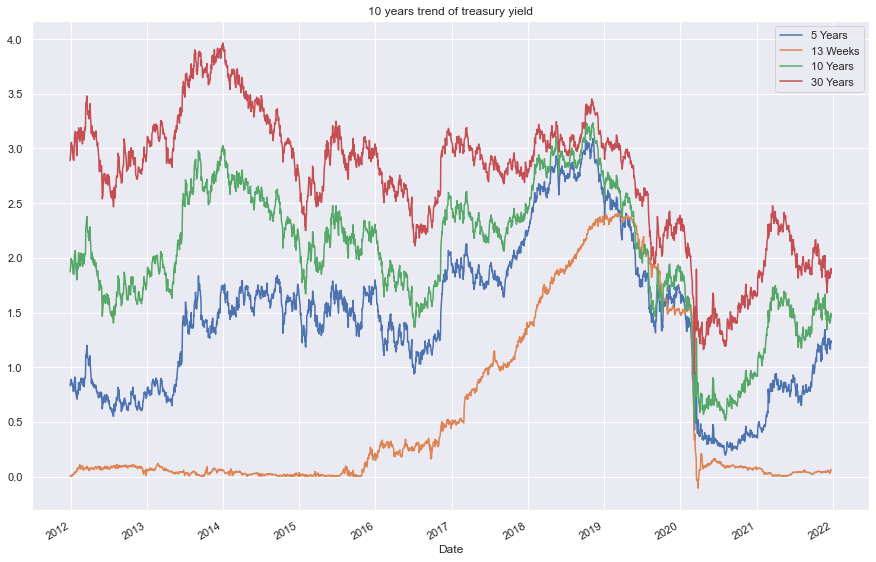

In [145]:
df_rate.plot()
plt.title("10 years trend of treasury yield")

## 股市和国债利率的相关度

## 重点公司数据监控

In [146]:

ticker_list=list(dict.fromkeys(ticker_list))

In [147]:
def get_stock_info(ticker):
    stock_info={}
    df=yf.download(ticker,start=dt.date.today()-dt.timedelta(days=366),auto_adjust=True,progress=True)
    stock_info=yf.Ticker(ticker).info
    stock_info['1w_chg_pct']=100*(df.loc[max(df.index)-dt.timedelta(weeks=1):,'Close'][-1]/df.loc[max(df.index)-dt.timedelta(weeks=1):,'Close'][0]-1)
    stock_info['1m_chg_pct']=100*(df.loc[max(df.index)-dt.timedelta(days=30):,'Close'][-1]/df.loc[max(df.index)-dt.timedelta(days=30):,'Close'][0]-1)
    stock_info['1y_chg_pct']=100*(df.loc[max(df.index)-dt.timedelta(days=365):,'Close'][-1]/df.loc[max(df.index)-dt.timedelta(days=365):,'Close'][0]-1)
    stock_info['max_drawdown']=100*(df.Close[-1]/max(df.Close)-1)
    stock_info['ticker']=ticker
    return stock_info


In [ ]:
df_stock=pd.DataFrame()
for ticker in ticker_list:
    try:
        stock_info=get_stock_info(ticker)
        df_stock=df_stock.append(stock_info,ignore_index=True)
    except:
        pass

df_stock['ratecode']=df_stock['financialCurrency']+'-'+df_stock['currency']
df_stock['ratecode']
df_stock['USD-USD']=1
df_stock['CNY-USD']=0.16
df_stock['TWD-USD']=0.036
df_stock['CNY-HKD']=1.22
df_stock['EUR-USD']=1.13
df_stock['rate']=df_stock['USD-USD'].where(df_stock['ratecode']=='USD-USD')
df_stock.loc[df_stock['rate'].isna(),['rate']]=df_stock['CNY-USD'].where(df_stock['ratecode']=='CNY-USD')
df_stock.loc[df_stock['rate'].isna(),['rate']]=df_stock['TWD-USD'].where(df_stock['ratecode']=='TWD-USD')
df_stock.loc[df_stock['rate'].isna(),['rate']]=df_stock['EUR-USD'].where(df_stock['ratecode']=='EUR-USD')
df_stock.loc[df_stock['rate'].isna(),['rate']]=df_stock['CNY-HKD'].where(df_stock['ratecode']=='CNY-HKD')
df_stock[['ticker','currency','financialCurrency','rate']]

In [149]:
df_vi_metric=pd.DataFrame()

df_vi_metric['ticker']=df_stock['ticker']
df_vi_metric['last_price']=df_stock['currentPrice']
df_vi_metric['target_price']=df_stock['targetMeanPrice']
df_vi_metric['1y_drawdown']=100*(df_stock['currentPrice']/df_stock['fiftyTwoWeekHigh']-1)
df_vi_metric['pcf']=df_stock['marketCap']/(df_stock['operatingCashflow']*df_stock['rate'])
df_vi_metric['pe_fwd']=df_stock['forwardPE']
df_vi_metric['revenue_growth']=df_stock['revenueGrowth']
df_vi_metric['cash_return_rate']=(df_stock['operatingCashflow']*df_stock['rate'])/df_stock['enterpriseValue']*100
df_vi_metric['roe']=df_stock['returnOnEquity']*100
df_vi_metric['gross_margin']=df_stock['grossMargins']*100
df_vi_metric['net_margin']=df_stock['profitMargins']*100
df_vi_metric['cf_margin']=df_stock['operatingCashflow']/df_stock['totalRevenue']*100
df_vi_metric['ps_ttm']=df_stock['priceToSalesTrailing12Months']
df_vi_metric['pe_ttm']=df_stock['currentPrice']/df_stock['trailingEps']
df_vi_metric['pb']=df_stock['priceToBook']
df_vi_metric['1m_chg_pct']=df_stock['1m_chg_pct']
df_vi_metric=df_vi_metric.set_index('ticker')

In [150]:
df_vi_metric.sort_values(by='pcf',inplace=True)
df_vi_metric.style.format(precision=2)


,last_price,target_price,1y_drawdown,pcf,pe_fwd,revenue_growth,cash_return_rate,roe,gross_margin,net_margin,cf_margin,ps_ttm,pe_ttm,pb,1m_chg_pct
ticker,,,,,,,,,,,,,,,
GS,385.04,456.88,-9.65,-16.42,10.70,0.28,3.70,21.96,89.52,38.20,-13.70,2.25,6.35,1.40,-4.74
BABA,118.66,209.51,-56.74,10.21,12.30,0.29,17.61,11.25,38.78,15.30,24.15,0.39,16.71,0.33,-11.22
MO,46.70,53.61,-11.20,10.36,9.67,-0.03,7.46,271.20,65.67,13.16,39.29,4.07,31.26,None,7.59
1810.HK,18.64,None,-48.08,12.12,27.82,0.55,7.17,23.89,15.88,9.52,11.55,1.71,nan,3.79,-3.22
BRK-B,294.49,337.00,-2.35,15.97,24.47,0.12,-167.35,19.34,41.39,32.00,15.70,2.51,0.01,0.00,2.06
FB,335.24,401.01,-12.77,17.39,23.56,0.35,6.04,32.10,80.85,35.88,47.73,8.30,23.99,7.02,-0.60
TSM,121.31,141.54,-14.69,17.60,26.66,0.16,14.66,29.67,51.90,37.93,65.73,0.42,32.57,0.32,-0.15
KO,58.04,61.93,-1.49,19.47,24.59,0.16,4.64,39.72,60.72,23.31,34.01,6.62,34.75,12.29,5.00
0700.HK,460.20,616.19,-40.66,20.96,23.83,0.14,4.64,24.27,44.96,34.42,31.44,8.04,41.78,5.12,-2.41


In [151]:
df_stock[df_stock['ticker']=='BABA']

,zip,sector,fullTimeEmployees,longBusinessSummary,city,phone,state,country,companyOfficers,website,...,underlyingExchangeSymbol,underlyingSymbol,uuid,ratecode,USD-USD,CNY-USD,TWD-USD,CNY-HKD,EUR-USD,rate
5,311121,Consumer Cyclical,258578.0,"Alibaba Group Holding Limited, through its sub...",Hangzhou,86 571 8502 2088,NaN,China,[],https://www.alibabagroup.com,...,NaN,NaN,NaN,CNY-USD,1,0.16,0.036,1.22,1.13,0.16
